In [ ]:
pip install pyedflib

In [ ]:
# import libraries
import pyedflib
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
from sklearn.decomposition import FastICA

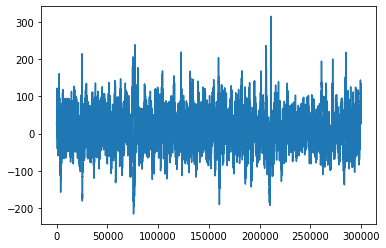

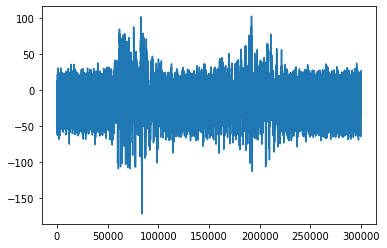

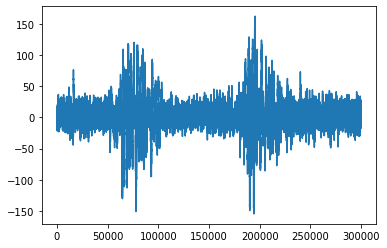

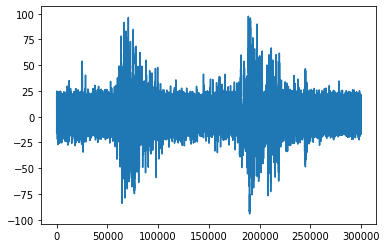

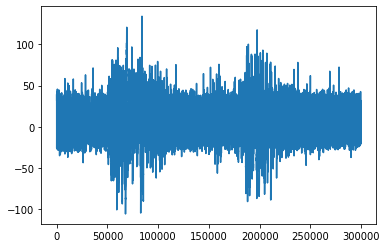

In [ ]:
# convert edf file to csv

# file_name = pyedflib.data.get_generator_filename()
f = pyedflib.EdfReader("/content/drive/MyDrive/INDQ/r01.edf")
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
fig = plt.figure()
ax = plt.axes()
for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)
        plt.plot(f.readSignal(i))
        plt.show()

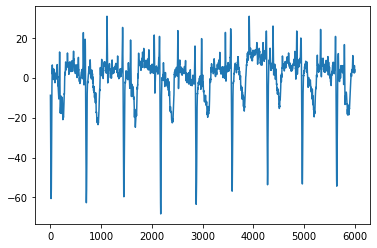

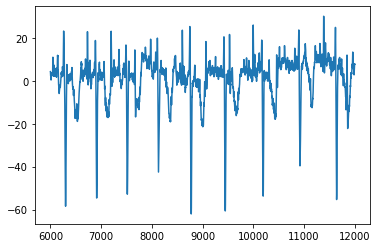

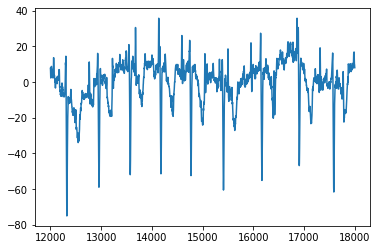

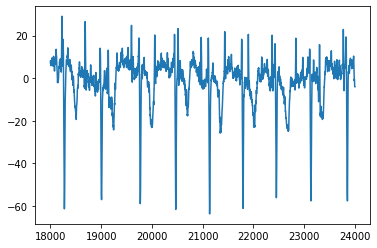

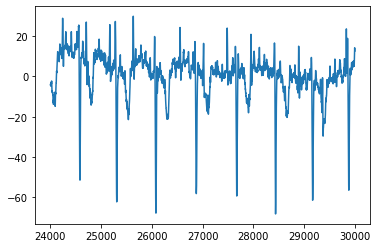

In [ ]:
# plotting single channel

for i in range(5):
  plt.plot(np.arange(6000*i,6000*(i+1)),data1[6000*i:6000*(i+1)])
  plt.show()

In [ ]:
# making mean zero

def center(x):
    mean = np.mean(x, axis=0, keepdims=True)
    centered =  x - mean
    return centered, mean

In [ ]:
def covariance(x):
    mean = np.mean(x, axis=0, keepdims=True)
    n = np.shape(x)[0] - 1
    m = x - mean

    return (m.dot(m.T))/n

In [ ]:
# just random checkings

print(np.mean(Xc, axis=0))
print(np.shape(Xc)[0])
print(covariance(Xc).shape)
print(Xc.shape)
print((Xc-np.mean(Xc, axis=0)).shape)

NameError: ignored

In [ ]:
# whitening the signal
def whitening(X):
    cov = np.cov(X)
    d, E = np.linalg.eigh(cov)
    D = np.diag(d)
    D_inv = np.sqrt(np.linalg.inv(D))
    X_whiten = np.dot(E, np.dot(D_inv, np.dot(E.T, X)))
    return X_whiten

In [ ]:
# defining mixed data
ch1= data1[0:5000]
ch2= data2[0:5000]
ch3= data3[0:5000]
dataX = np.array([ch1, ch2, ch3]).T
print(dataX.shape)

(5000, 3)


In [ ]:
Xc, meanX = center(dataX)
# Xw, whiteM = whiten(Xc.T)
Xw = whitening(Xc.T)
print(Xw.shape)

(3, 5000)


In [ ]:
conformation check for whitening
print(np.round(covariance(Xw)))

[[ 1. -0. -0.]
 [-0.  1. -0.]
 [-0. -0.  1.]]


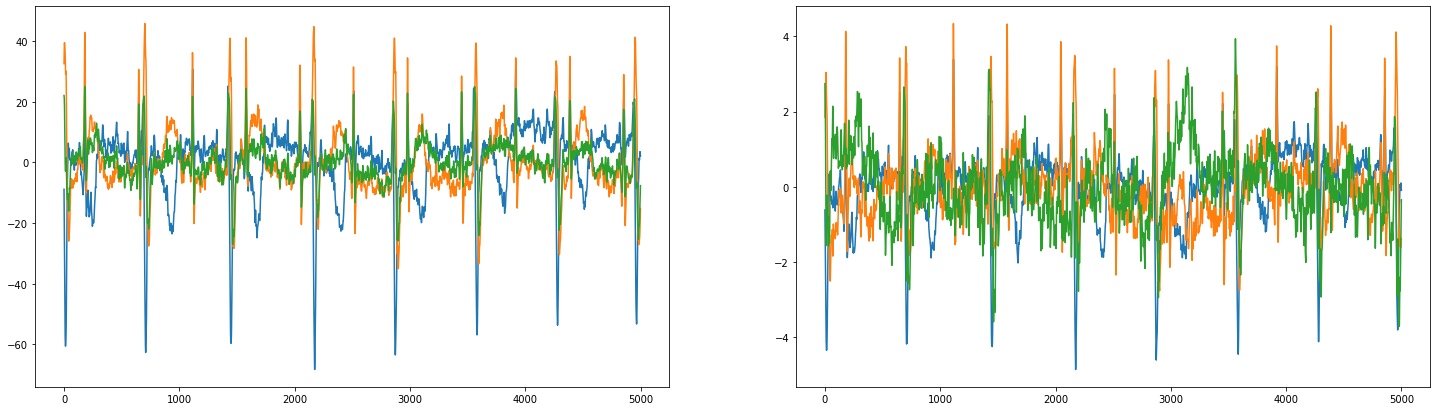

In [ ]:
# visulaize the difference of whitening and centering


fig,ax = plt.subplots(1,2, figsize=(25,7))
ax[0].plot(dataX)
ax[1].plot(Xw.T)
# plt.plot(Xc[0])
# plt.plot(Xc[1])
# plt.plot(Xc[2])

In [ ]:
ica = FastICA(n_components=3)
S_ = ica.fit_transform(Xw.T)
A_ = ica.mixing_

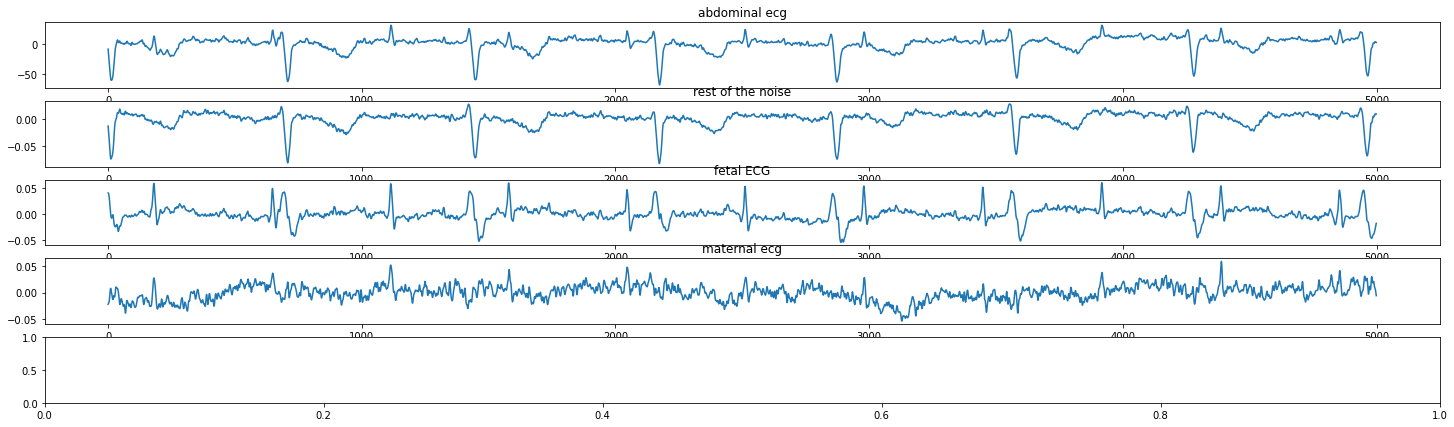

In [ ]:
# visualising different extracted signals
fig, ax = plt.subplots(5,1, figsize=(25,7))
ax[0].set_title('abdominal ecg')
ax[0].plot(dataX.T[0])
ax[1].set_title("rest of the noise")
ax[1].plot(-S_.T[1])
ax[2].set_title("fetal ECG")
ax[2].plot(-S_.T[0])
ax[3].set_title("maternal ecg")
ax[3].plot(-S_.T[2])
# ax[4].plot(Xw[2].T)